## Problem Statement::

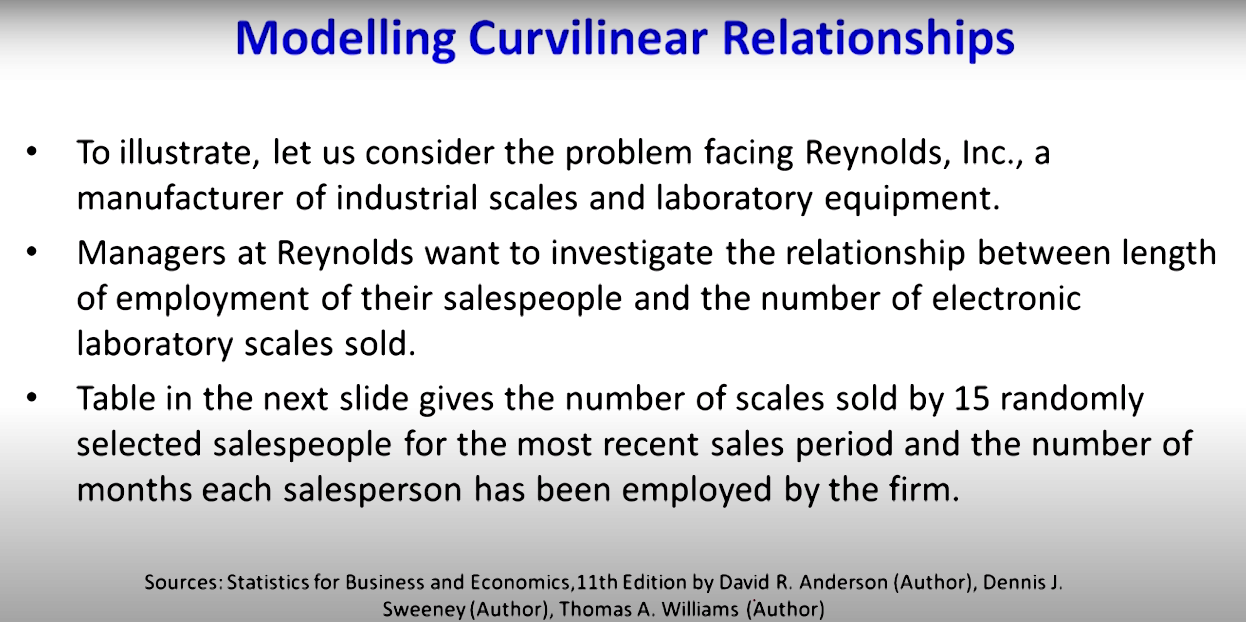

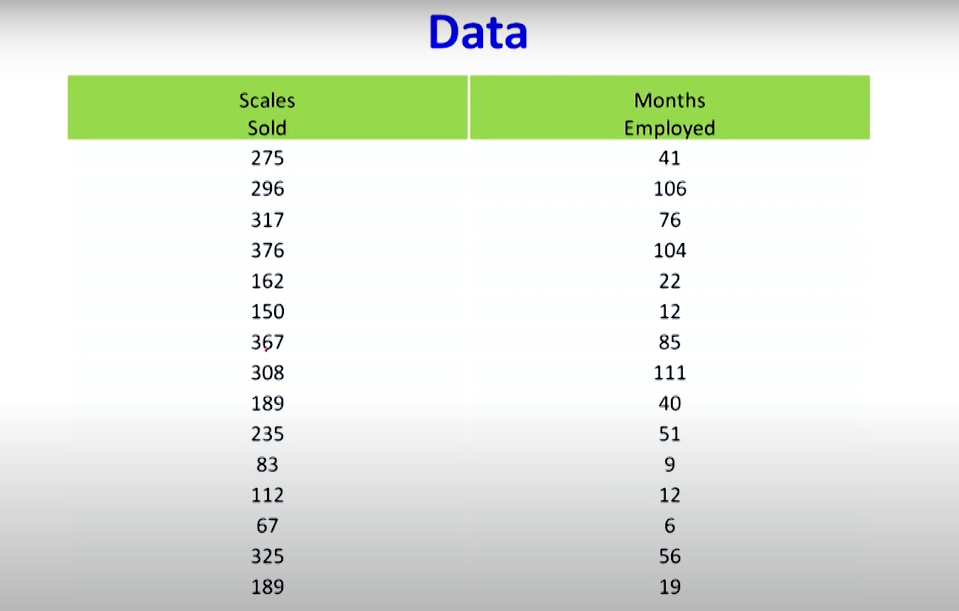

## SOLUTION::

In [1]:
import pandas as pd

data = pd.read_excel("/home/ashish/projects/Curvilinear_models/Reynolds.xlsx")
data

,ScalesSold,MonthsEmployed
0,275,41
1,296,106
2,317,76
3,376,104
4,162,22
5,150,12
6,367,85
7,308,111
8,189,40
9,235,51


In [5]:
x = data['MonthsEmployed']
y = data['ScalesSold']

import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ScalesSold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.24e-05
Time:                        01:53:26   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.143      0.000      64.503     157.952
MonthsEmployed     2.3768      0.349      6.812      0.000       1.623       3.131
==============================================================================
Omnibus:                        1.043   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.723
Skew:                           0.052   Prob(JB):                        0.697
Kurtosis:                       1.930   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

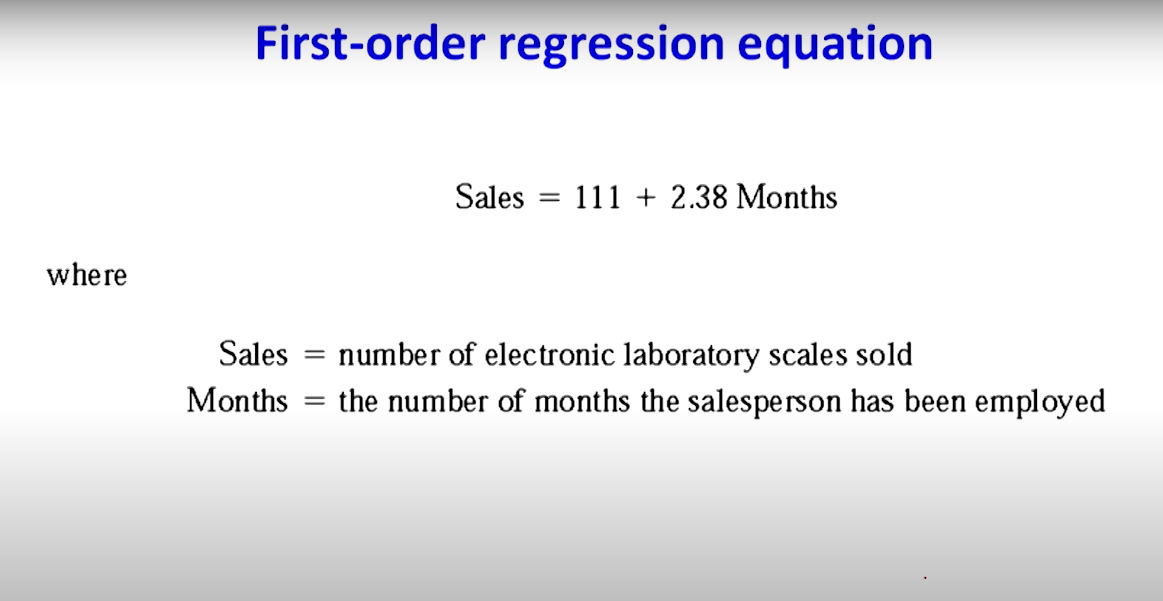

## SInce overall model and each independent variable is significant according to the OLS model SO now, we will be plotting standadrdized residuals for confirming the linear relationship the last time.

In [6]:
Errors = model.resid_pearson
Errors

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [7]:
y_hat = model.predict(x)
y_hat

0     208.675693
1     363.166061
2     291.862814
3     358.412511
4     163.516970
5     139.749221
6     313.253788
7     375.049935
8     206.298918
9     232.443442
10    132.618896
11    139.749221
12    125.488571
13    244.327316
14    156.386645
dtype: float64

Text(0, 0.5, 'Residuals')

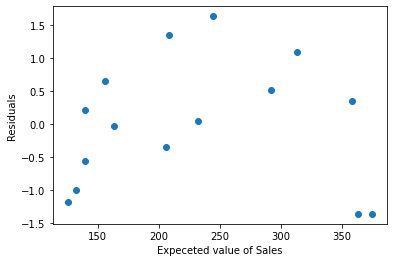

In [37]:
## Standardized Residual Plot
import matplotlib.pyplot as plt
plt.scatter(y_hat,Errors)
plt.xlabel("Expeceted value of Sales")
plt.ylabel("Residuals")

## IMPORTANT NOTE

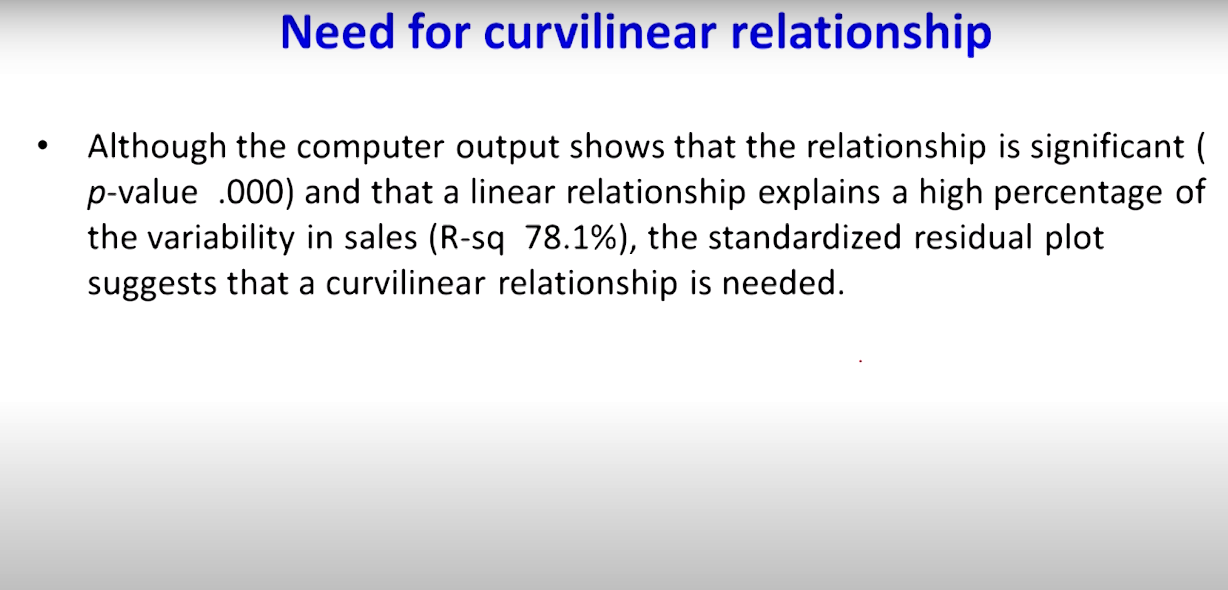

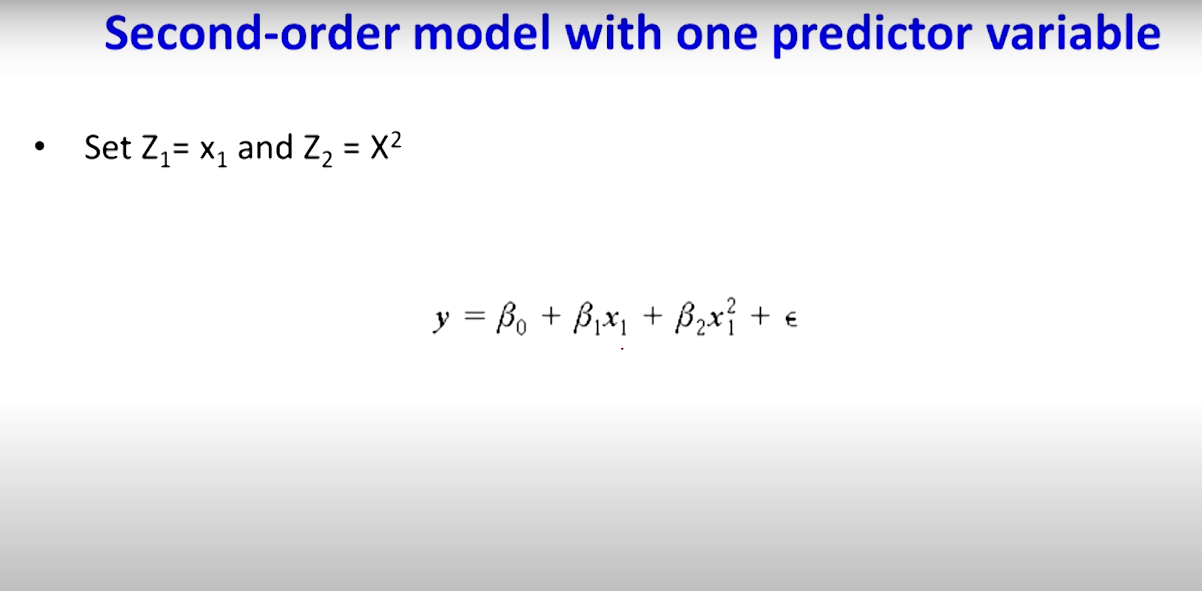

In [38]:
x_square = (x**2)
x_square = x_square['MonthsEmployed']
x_square

0      1681
1     11236
2      5776
3     10816
4       484
5       144
6      7225
7     12321
8      1600
9      2601
10       81
11      144
12       36
13     3136
14      361
Name: MonthsEmployed, dtype: int64

In [39]:
import numpy as np
x_new = np.column_stack([x,x_square])  ## In this method  1-D arrays are turned into 2-D columns first.
x_new = sm.add_constant(x_new)
model2 = sm.OLS(y,x_new).fit()
model2.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ScalesSold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           8.75e-07
Time:                        02:21:00   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.070      -4.274      94.969
x1             6.3448      1.058      5.998      0.000       4.040       8.650
x2            -0.0345      0.009     -3.854      0.002      -0.054      -0.015
==============================================================================
Omnibus:                        2.162   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.003
Skew:                          -0.126   Prob(JB):                        0.606
Kurtosis:                       1.758   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
## Again plotting residual plot for new model because individual indepedent variables
## as well as overall model are significant.

residuals2 = model2.resid_pearson
residuals2

array([ 0.797777  , -0.99895952, -0.32984543,  1.27097898, -0.18118441,
        0.97178443,  0.91436152, -0.48542046, -1.59531168, -1.28395183,
       -0.48348828, -0.13117488, -0.44045635,  0.94303218,  1.03185873])

In [41]:
y_hat2 = model2.predict(x_new)
y_hat2

array([247.5143749 , 330.41691942, 328.36408757, 332.21125762,
       168.24230429, 116.51933758, 335.49771571, 324.72407789,
       243.96290147, 279.23569304,  99.65750913, 116.51933758,
        82.17493987, 292.50993204, 153.44961189])

Text(0, 0.5, 'Residuals')

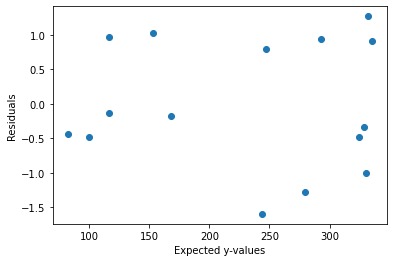

In [42]:
plt.scatter(y_hat2,residuals2)
plt.xlabel("Expected y-values")
plt.ylabel("Residuals")

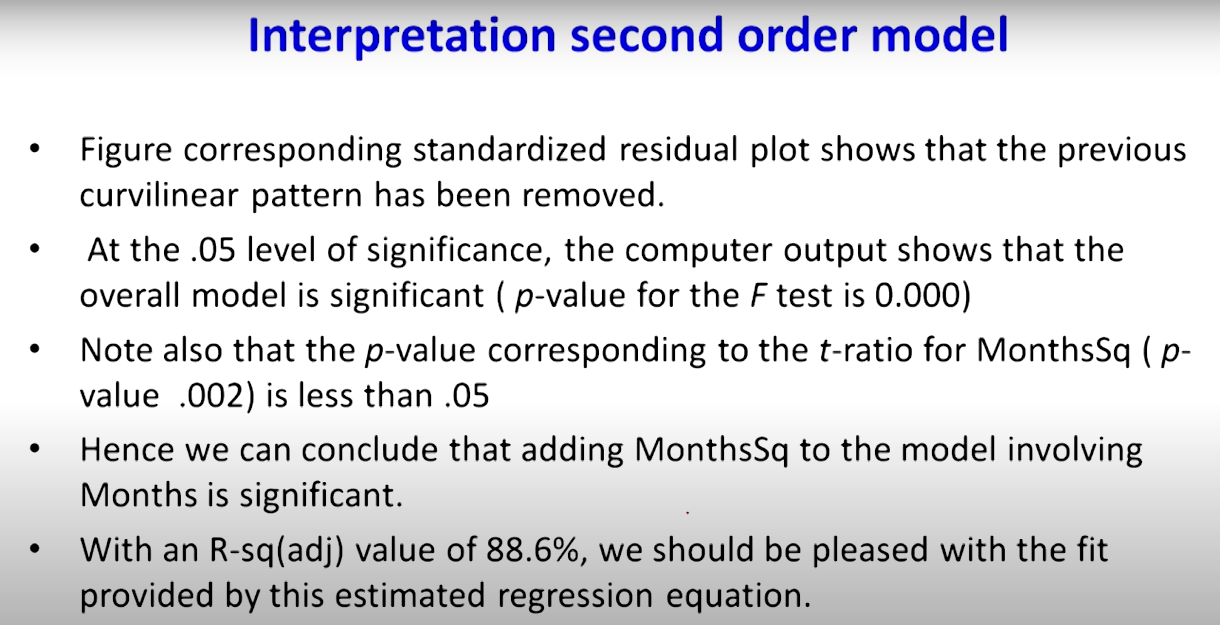

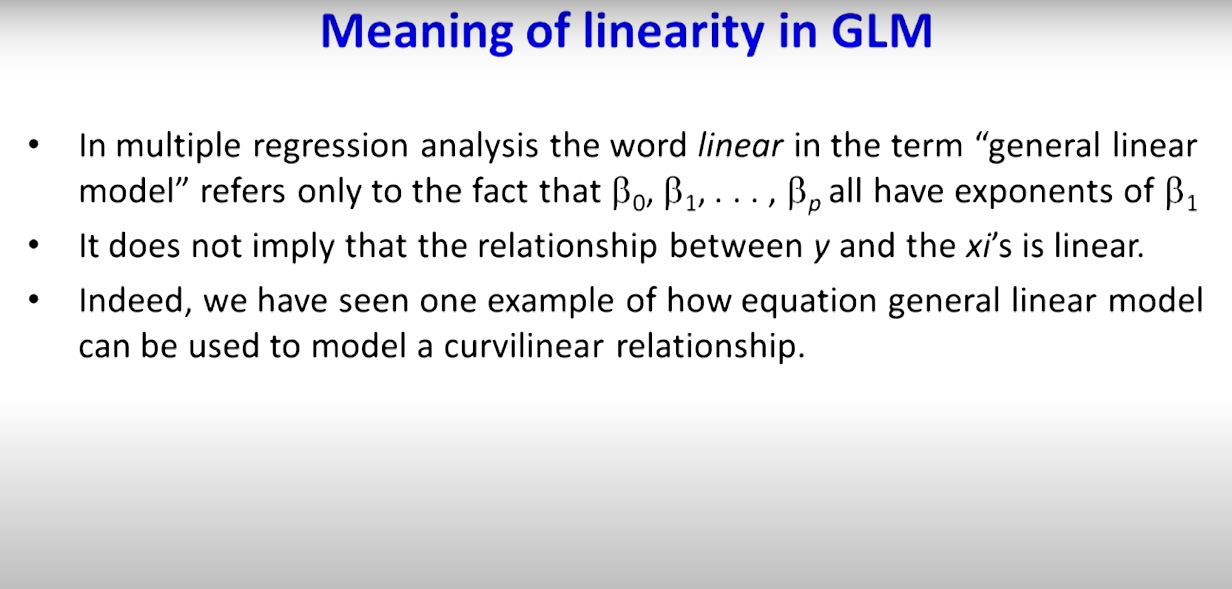